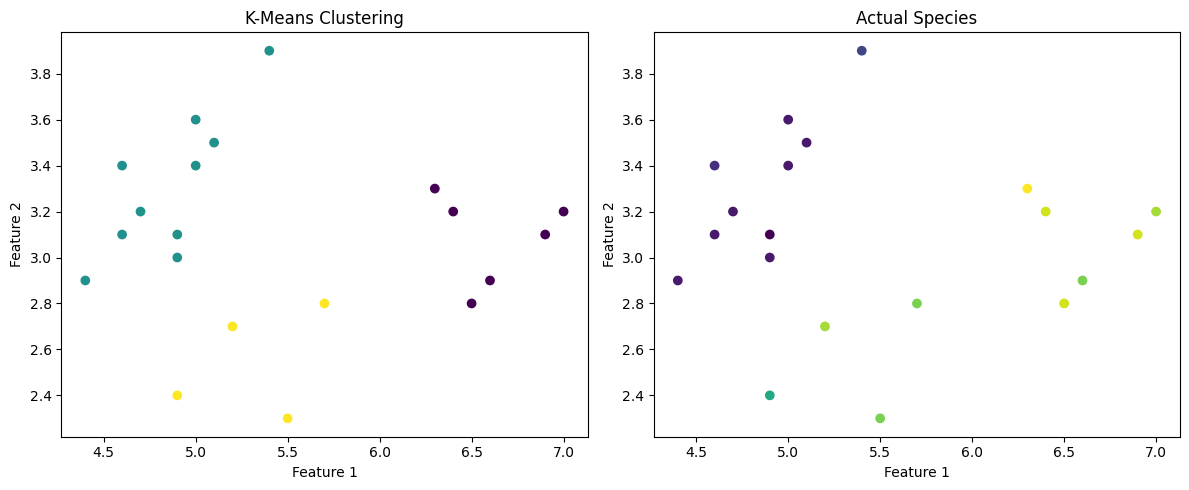

First three eigenvectors:
[[-0.62559162  0.45639616  0.63272243]
 [ 0.34805338  0.88911568 -0.29720726]
 [-0.69820768  0.03429081 -0.71507354]]
Corresponding eigenvalues:
[2.10843108 1.00330091 0.04616276]


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def k_means_clustering(dataset, k, max_iterations=100):
    np.random.seed(0)
    centroids = dataset[np.random.choice(range(dataset.shape[0]), size=k, replace=False)]
    clusters = np.zeros(len(dataset))
    
    for _ in range(max_iterations):
        # Assign points to the closest centroid
        for i, point in enumerate(dataset):
            distances = np.linalg.norm(point - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        
        # Update centroids
        for j in range(k):
            cluster_points = dataset[clusters == j]
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)
    
    return clusters
threeigenvectors=[[0]]
def pca(dataset):
    # Normalize the data
    dataset = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)
    
    # Calculate covariance matrix
    covariance_matrix = np.cov(dataset.T)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project data onto the first three eigenvectors
    projected_data = dataset.dot(eigenvectors[:, :3])
    

    return projected_data, eigenvalues[:3] , eigenvectors

# Sample dataset (Iris dataset without the 'Species' column)
dataset = np.array([[5.1, 3.5, 1.4, 0.2],
                    [4.9, 3.0, 1.4, 0.2],
                    [4.7, 3.2, 1.3, 0.2],
                    [4.6, 3.1, 1.5, 0.2],
                    [5.0, 3.6, 1.4, 0.2],
                    [5.4, 3.9, 1.7, 0.4],
                    [4.6, 3.4, 1.4, 0.3],
                    [5.0, 3.4, 1.5, 0.2],
                    [4.4, 2.9, 1.4, 0.2],
                    [4.9, 3.1, 1.5, 0.1],
                    [7.0, 3.2, 4.7, 1.4],
                    [6.4, 3.2, 4.5, 1.5],
                    [6.9, 3.1, 4.9, 1.5],
                    [5.5, 2.3, 4.0, 1.3],
                    [6.5, 2.8, 4.6, 1.5],
                    [5.7, 2.8, 4.5, 1.3],
                    [6.3, 3.3, 4.7, 1.6],
                    [4.9, 2.4, 3.3, 1.0],
                    [6.6, 2.9, 4.6, 1.3],
                    [5.2, 2.7, 3.9, 1.4]])

# Remove the 'Species' column and store it for future comparison
species = dataset[:, -1]
dataset = dataset[:, :-1]

# Perform K-Means Clustering
k = 3  # Number of clusters
clusters = k_means_clustering(dataset, k)

# Perform PCA
projected_data, eigenvalues , eigenvectors = pca(dataset)

# Plotting K-Means Clustering results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].scatter(dataset[:, 0], dataset[:, 1], c=clusters)
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('K-Means Clustering')

# Plotting actual species
ax[1].scatter(dataset[:, 0], dataset[:, 1], c=species)
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('Actual Species')

plt.tight_layout()
plt.show()

# Display first three eigenvectors and their eigenvalues
print('First three eigenvectors:')
print(eigenvectors[:,:3])
print('Corresponding eigenvalues:')
print(eigenvalues[:3])
